In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.decomposition import PCA



In [3]:
df1_final = pd.read_csv('../data/processed_data/df1_one_hot.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [4]:
df1_final = df1_final.iloc[:, 1:]

In [5]:
df1_final = df1_final.dropna()

In [187]:
remain = ['revol_bal', 'out_prncp', 'tot_cur_bal', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'fico_range_low', 'fico_range_high',
       'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'acc_now_delinq',
       'delinq_amnt', 'num_tl_90g_dpd_24m', 'percent_bc_gt_75', 'open_acc',
       'total_rev_hi_lim', 'gdp', 'unemployment_insur', 'dividend',
       'emp_length', 'annual_inc', 'dti', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE',
       'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE', 'HIAC_FEMALE', 'HAAC_MALE',
       'HAAC_FEMALE', 'HNAC_MALE', 'HNAC_FEMALE','hardship']
rem_col = ['veri_0',
       'veri_1', 'veri_2', 'home_own_0', 'home_own_1', 'home_own_2',
       'home_own_3']

In [87]:
df1_final[df1_final['hardship']==1]

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,hardship
220,3045.000,0.000,316524.000,143.000,192.000,670.000,674.000,4.000,15.000,0.000,...,0.086,0.007,0.007,0.002,0.002,0.001,0.001,0.000,0.000,1
254,11113.000,7862.050,169184.000,73.000,94.000,700.000,704.000,0.000,300.000,0.000,...,0.197,0.006,0.006,0.004,0.003,0.001,0.001,0.000,0.000,1
342,2193.000,0.000,201577.000,43.000,33.000,740.000,744.000,0.000,300.000,0.000,...,0.020,0.003,0.001,0.001,0.001,0.000,0.000,0.000,0.000,1
632,14877.000,0.000,40798.000,148.000,121.000,660.000,664.000,1.000,11.000,2.000,...,0.010,0.002,0.001,0.001,0.001,0.000,0.000,0.000,0.000,1
707,26981.000,16885.850,474040.000,129.000,203.000,745.000,749.000,0.000,300.000,0.000,...,0.075,0.009,0.008,0.010,0.008,0.001,0.002,0.001,0.001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961446,26232.000,0.000,129056.000,120.000,252.000,675.000,679.000,0.000,300.000,1.000,...,0.115,0.005,0.004,0.001,0.002,0.001,0.001,0.000,0.000,1
3961645,23983.000,0.000,164274.000,161.000,199.000,675.000,679.000,2.000,8.000,0.000,...,0.082,0.003,0.003,0.006,0.006,0.002,0.002,0.001,0.001,1
3962088,17629.000,9574.630,38654.000,129.000,222.000,685.000,689.000,0.000,42.000,0.000,...,0.228,0.006,0.007,0.009,0.008,0.005,0.005,0.001,0.001,1
3962089,17629.000,9574.630,38654.000,129.000,222.000,685.000,689.000,0.000,42.000,0.000,...,0.228,0.006,0.007,0.009,0.008,0.005,0.005,0.001,0.001,1


In [59]:
df1_final

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HNAC_MALE,HNAC_FEMALE,veri_0,veri_1,veri_2,home_own_0,home_own_1,home_own_2,home_own_3,hardship
0,2765.000,0.000,144904.000,148.000,128.000,675.000,679.000,0.000,30.000,0.000,...,0.001,0.001,0,1,0,1,0,0,0,0
1,2765.000,0.000,144904.000,148.000,128.000,675.000,679.000,0.000,30.000,0.000,...,0.001,0.001,0,1,0,1,0,0,0,0
2,21470.000,0.000,204396.000,113.000,192.000,715.000,719.000,1.000,6.000,0.000,...,0.000,0.000,0,1,0,1,0,0,0,0
3,21470.000,0.000,204396.000,113.000,192.000,715.000,719.000,1.000,6.000,0.000,...,0.000,0.000,0,1,0,1,0,0,0,0
4,7869.000,0.000,189699.000,125.000,184.000,695.000,699.000,0.000,300.000,0.000,...,0.000,0.000,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962717,8633.000,23252.590,28398.000,154.000,258.000,705.000,709.000,7.000,9.000,0.000,...,0.001,0.001,0,0,1,1,0,0,0,0
3962718,17641.000,0.000,62426.000,132.000,206.000,660.000,664.000,0.000,67.000,1.000,...,0.000,0.000,0,1,0,0,1,0,0,0
3962719,17641.000,0.000,62426.000,132.000,206.000,660.000,664.000,0.000,67.000,1.000,...,0.000,0.000,0,1,0,0,1,0,0,0
3962720,7662.000,8456.120,143066.000,149.000,243.000,660.000,664.000,0.000,37.000,0.000,...,0.001,0.001,0,0,1,1,0,0,0,0


In [6]:
df1_kmeans = df1_final[df1_final['hardship']==0]
del df1_kmeans['id']
del df1_kmeans['hardship']
df1_kmeans = df1_kmeans.iloc[:,:-7]

In [7]:
df1_kmeans

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.053802,0.053729,0.017131,0.018317,0.004649,0.004690,0.001567,0.001567,0.000769,0.000896
1,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.053802,0.053729,0.017131,0.018317,0.004649,0.004690,0.001567,0.001567,0.000769,0.000896
2,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.009079,0.006052,0.000000,0.000000,0.001345,0.001345,0.000000,0.000000,0.000000,0.000000
3,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.009079,0.006052,0.000000,0.000000,0.001345,0.001345,0.000000,0.000000,0.000000,0.000000
4,7869.0,0.00,189699.0,125.0,184.0,695.0,699.0,0.0,300.0,0.0,...,0.084710,0.080259,0.003196,0.003358,0.002525,0.002365,0.000977,0.000999,0.000247,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962717,8633.0,23252.59,28398.0,154.0,258.0,705.0,709.0,7.0,9.0,0.0,...,0.161571,0.160922,0.003222,0.003238,0.005955,0.005777,0.004399,0.004495,0.000949,0.000958
3962718,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.103093,0.102997,0.006770,0.006954,0.003166,0.002276,0.001027,0.001016,0.000468,0.000423
3962719,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.103093,0.102997,0.006770,0.006954,0.003166,0.002276,0.001027,0.001016,0.000468,0.000423
3962720,7662.0,8456.12,143066.0,149.0,243.0,660.0,664.0,0.0,37.0,0.0,...,0.207235,0.198864,0.006712,0.006723,0.005852,0.005282,0.001921,0.001934,0.000561,0.000531


In [8]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df1_kmeans), columns=df1_kmeans.columns)

df_std

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,-0.599456,-0.616046,0.018491,0.127385,-0.548256,-0.707944,-0.707931,-0.356623,-1.036904,-0.356355,...,-0.406638,-0.369834,2.221967,2.237761,0.145357,0.247159,-0.025294,-0.034000,0.268202,0.500484
1,-0.599456,-0.616046,0.018491,0.127385,-0.548256,-0.707944,-0.707931,-0.356623,-1.036904,-0.356355,...,-0.406638,-0.369834,2.221967,2.237761,0.145357,0.247159,-0.025294,-0.034000,0.268202,0.500484
2,0.206701,-0.616046,0.389971,-0.291181,0.105670,0.499170,0.499150,0.773514,-1.216506,-0.356355,...,-0.968131,-0.963064,-1.005436,-0.930437,-0.774022,-0.727349,-0.886745,-0.877772,-0.716128,-0.676137
3,0.206701,-0.616046,0.389971,-0.291181,0.105670,0.499170,0.499150,0.773514,-1.216506,-0.356355,...,-0.968131,-0.963064,-1.005436,-0.930437,-0.774022,-0.727349,-0.886745,-0.877772,-0.716128,-0.676137
4,-0.379482,-0.616046,0.298200,-0.147673,0.023929,-0.104387,-0.104390,-0.356623,0.983618,-0.356355,...,-0.018605,-0.039729,-0.403238,-0.349597,-0.445694,-0.430234,-0.349600,-0.339777,-0.399948,-0.391866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951856,-0.346554,2.447447,-0.708996,0.199140,0.780031,0.197391,0.197380,7.554337,-1.194056,-0.356355,...,0.946373,0.963957,-0.398495,-0.370446,0.508555,0.563994,1.530890,1.543022,0.499813,0.581250
3951857,0.041677,-0.616046,-0.496519,-0.063959,0.248716,-1.160611,-1.160586,-0.356623,-0.760018,1.343378,...,0.212192,0.243200,0.270078,0.272344,-0.267296,-0.455972,-0.322288,-0.330898,-0.117179,-0.121135
3951858,0.041677,-0.616046,-0.496519,-0.063959,0.248716,-1.160611,-1.160586,-0.356623,-0.760018,1.343378,...,0.212192,0.243200,0.270078,0.272344,-0.267296,-0.455972,-0.322288,-0.330898,-0.117179,-0.121135
3951859,-0.388403,0.498035,0.007014,0.139344,0.626767,-1.160611,-1.160586,-0.356623,-0.984520,-0.356355,...,1.519671,1.436062,0.259037,0.232359,0.479895,0.419553,0.169054,0.163721,0.002550,0.021257


In [190]:
import torch
import numpy as np
import random
import sys

device_gpu = torch.device('cuda')
device_cpu = torch.device('cpu')

# Choosing `num_centers` random data points as the initial centers
def random_init(dataset, num_centers):
    num_points = dataset.size(0)
    dimension = dataset.size(1)
    used = torch.zeros(num_points, dtype=torch.long)
    indices = torch.zeros(num_centers, dtype=torch.long)
    for i in range(num_centers):
        while True:
            cur_id = random.randint(0, num_points - 1)
            if used[cur_id] > 0:
                continue
            used[cur_id] = 1
            indices[i] = cur_id
            break
    indices = indices.to(device_gpu)
    centers = torch.gather(dataset, 0, indices.view(-1, 1).expand(-1, dimension))
    return centers

# Compute for each data point the closest center
def compute_codes(dataset, centers):
    num_points = dataset.size(0)
    dimension = dataset.size(1)
    num_centers = centers.size(0)
    # 5e8 should vary depending on the free memory on the GPU
    # Ideally, automatically ;)
    chunk_size = int(5e8 / num_centers)
    codes = torch.zeros(num_points, dtype=torch.long, device=device_gpu)
    centers_t = torch.transpose(centers, 0, 1)
    
#     centers_norms = torch.sum(centers **, dim=1).view(1, -1)
    centers_norms = torch.sum(torch.abs(centers), dim=1).view(1, -1)
    for i in range(0, num_points, chunk_size):
        begin = i
        end = min(begin + chunk_size, num_points)
        dataset_piece = dataset[begin:end, :]
#         dataset_norms = torch.sum(dataset_piece ** 2, dim=1).view(-1, 1)
        dataset_norms = torch.sum(torch.abs(dataset_piece), dim=1).view(-1, 1)
        distances = torch.mm(dataset_piece, centers_t)
        distances *= -2.0
        distances += dataset_norms
        distances += centers_norms
        _, min_ind = torch.min(distances, dim=1)
        codes[begin:end] = min_ind
    return codes

# Compute new centers as means of the data points forming the clusters
def update_centers(dataset, codes, num_centers):
    num_points = dataset.size(0)
    dimension = dataset.size(1)
    centers = torch.zeros(num_centers, dimension, dtype=torch.float, device=device_gpu)
    cnt = torch.zeros(num_centers, dtype=torch.float, device=device_gpu)
    centers.scatter_add_(0, codes.view(-1, 1).expand(-1, dimension), dataset)
    cnt.scatter_add_(0, codes, torch.ones(num_points, dtype=torch.float, device=device_gpu))
    # Avoiding division by zero
    # Not necessary if there are no duplicates among the data points
    cnt = torch.where(cnt > 0.5, cnt, torch.ones(num_centers, dtype=torch.float, device=device_gpu))
    centers /= cnt.view(-1, 1)
    return centers

def cluster(dataset, num_centers):
    centers = random_init(dataset, num_centers)
    codes = compute_codes(dataset, centers)
    num_iterations = 0
    while True:
        sys.stdout.write('.')
        sys.stdout.flush()
        num_iterations += 1
        centers = update_centers(dataset, codes, num_centers)
        new_codes = compute_codes(dataset, centers)
        # Waiting until the clustering stops updating altogether
        # This is too strict in practice
        if torch.equal(codes, new_codes):
            sys.stdout.write('\n')
            print('Converged in %d iterations' % num_iterations)
            break
        codes = new_codes
    return centers, codes


    

In [191]:
df_std = df_std.dropna()

In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)



# Choose optimal K using Elbow method
cost = []
ks = [] 

n = len(df_std)
d = len(df_std.columns)
center_save = []
codes_save = [] 
for i in range(1, 15):
    num_centers = i
    ks.append(i)
    # It's (much) better to use 32-bit floats, for the sake of performance
    dataset_numpy = df_std.values.astype(np.float32)
    dataset = torch.from_numpy(dataset_numpy).to(device_gpu)
    print('Starting clustering')
    centers, codes = cluster(dataset, num_centers)
    center_save.append(centers)
    codes_save.append(codes)
    cost.append(codes.cpu().numpy())
    
    distortions = [] 
    for k in centers:
    #     kmeanModel = KMeans(n_clusters=k).fit(X)
    #     kmeanModel.fit(X)
        distortions.append(torch.sum(torch.min(torch.cdist(dataset, centers, p=1), axis=1)[0]) / dataset.shape[0])
    cost.append(distortions[0].cpu().numpy())
# Converting the results into a dataframe and plotting them
print('end')


In [193]:
new_cost = []
for i in range(len(cost)):
    if i%2 == 1: 
         new_cost.append(float(cost[i]))

Text(0.5, 1.0, 'Elbow Curve')

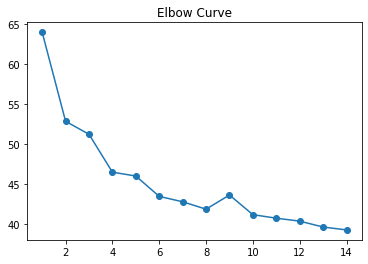

In [194]:
plt.scatter(ks, new_cost)
plt.plot(ks, new_cost)
plt.title('Elbow Curve')

In [ ]:
for i in range(len(new_cost)): 
    if i == 0: continue 
    
    print(new_cost[i]-new_cost[i-1])
    

In [196]:
codes = codes_save[6].cpu().numpy()
centers = center_save[6].cpu().numpy()
# pd.DataFrame(codes).to_csv('codes.csv')
# pd.DataFrame(centers).to_csv('centers.csv')

In [9]:
# codes = pd.read_csv('codes.csv')
df_codes = pd.DataFrame(codes)
codes = codes.iloc[:,1:]
# codes.rename('clusters')
# centers = pd.from_csv('centers.csv')

In [10]:
codes = codes.rename(columns={'0':'cluster'})
df1_kmeans = df1_kmeans.join(codes)

In [11]:
df1_kmeans

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,cluster
0,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.053729,0.017131,0.018317,0.004649,0.004690,0.001567,0.001567,0.000769,0.000896,2.0
1,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.053729,0.017131,0.018317,0.004649,0.004690,0.001567,0.001567,0.000769,0.000896,2.0
2,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.006052,0.000000,0.000000,0.001345,0.001345,0.000000,0.000000,0.000000,0.000000,4.0
3,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.006052,0.000000,0.000000,0.001345,0.001345,0.000000,0.000000,0.000000,0.000000,4.0
4,7869.0,0.00,189699.0,125.0,184.0,695.0,699.0,0.0,300.0,0.0,...,0.080259,0.003196,0.003358,0.002525,0.002365,0.000977,0.000999,0.000247,0.000217,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962717,8633.0,23252.59,28398.0,154.0,258.0,705.0,709.0,7.0,9.0,0.0,...,0.160922,0.003222,0.003238,0.005955,0.005777,0.004399,0.004495,0.000949,0.000958,NaN
3962718,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.102997,0.006770,0.006954,0.003166,0.002276,0.001027,0.001016,0.000468,0.000423,NaN
3962719,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.102997,0.006770,0.006954,0.003166,0.002276,0.001027,0.001016,0.000468,0.000423,NaN
3962720,7662.0,8456.12,143066.0,149.0,243.0,660.0,664.0,0.0,37.0,0.0,...,0.198864,0.006712,0.006723,0.005852,0.005282,0.001921,0.001934,0.000561,0.000531,NaN


In [14]:
df_hards = df1_final[df1_final['hardship']==1]


In [15]:
# df_codes = pd.Series(codes)
df_repeats = df1_kmeans['cluster'].value_counts().sort_index()
df_weights = round(df_repeats/df_repeats.sum()*len(df_hards))
counts = df_weights.values.tolist()
counts
# counts = df_repeats.values.tolist()

[1424.0, 645.0, 1411.0, 2262.0, 2446.0, 1271.0, 1403.0]

In [197]:
# df_codes = pd.read_csv('codes.csv').iloc[:,1:]
# df_centers = pd.read_csv('centers.csv').iloc[:,1:]

In [16]:
df_clut = df1_final[df1_final['hardship']==0]


In [17]:
df_clut.reset_index(inplace=True)

In [18]:
df_clut = df_clut.join(codes)

In [19]:
df_clut

,index,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,...,id,hardship,veri_0,veri_1,veri_2,home_own_0,home_own_1,home_own_2,home_own_3,cluster
0,0,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,...,68407277,0,0,1,0,1,0,0,0,2
1,1,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,...,68407277,0,0,1,0,1,0,0,0,2
2,2,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,...,68355089,0,0,1,0,1,0,0,0,4
3,3,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,...,68355089,0,0,1,0,1,0,0,0,4
4,4,7869.0,0.00,189699.0,125.0,184.0,695.0,699.0,0.0,300.0,...,68341763,0,0,1,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951856,3962717,8633.0,23252.59,28398.0,154.0,258.0,705.0,709.0,7.0,9.0,...,88985880,0,0,0,1,1,0,0,0,6
3951857,3962718,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,...,88224441,0,0,1,0,0,1,0,0,5
3951858,3962719,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,...,88224441,0,0,1,0,0,1,0,0,5
3951859,3962720,7662.0,8456.12,143066.0,149.0,243.0,660.0,664.0,0.0,37.0,...,88215728,0,0,0,1,1,0,0,0,5


In [208]:
df_std['cluster'] = df_codes
df_std

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HNAC_FEMALE,id,hardship,veri_0,veri_1,veri_2,home_own_0,home_own_1,home_own_2,cluster
0,-0.599,-0.616,0.018,0.127,-0.548,-0.708,-0.708,-0.357,-1.037,-0.356,...,0.500,-0.529,0.000,-0.835,1.429,-0.593,1.019,-0.805,-0.362,2
1,-0.599,-0.616,0.018,0.127,-0.548,-0.708,-0.708,-0.357,-1.037,-0.356,...,0.500,-0.529,0.000,-0.835,1.429,-0.593,1.019,-0.805,-0.362,2
2,0.207,-0.616,0.390,-0.291,0.106,0.499,0.499,0.774,-1.217,-0.356,...,-0.676,-0.530,0.000,-0.835,1.429,-0.593,1.019,-0.805,-0.362,4
3,0.207,-0.616,0.390,-0.291,0.106,0.499,0.499,0.774,-1.217,-0.356,...,-0.676,-0.530,0.000,-0.835,1.429,-0.593,1.019,-0.805,-0.362,4
4,-0.379,-0.616,0.298,-0.148,0.024,-0.104,-0.104,-0.357,0.984,-0.356,...,-0.392,-0.530,0.000,-0.835,1.429,-0.593,1.019,-0.805,-0.362,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951856,-0.347,2.447,-0.709,0.199,0.780,0.197,0.197,7.554,-1.194,-0.356,...,0.581,-0.001,0.000,-0.835,-0.700,1.687,1.019,-0.805,-0.362,6
3951857,0.042,-0.616,-0.497,-0.064,0.249,-1.161,-1.161,-0.357,-0.760,1.343,...,-0.121,-0.020,0.000,-0.835,1.429,-0.593,-0.981,1.242,-0.362,5
3951858,0.042,-0.616,-0.497,-0.064,0.249,-1.161,-1.161,-0.357,-0.760,1.343,...,-0.121,-0.020,0.000,-0.835,1.429,-0.593,-0.981,1.242,-0.362,5
3951859,-0.388,0.498,0.007,0.139,0.627,-1.161,-1.161,-0.357,-0.985,-0.356,...,0.021,-0.021,0.000,-0.835,-0.700,1.687,1.019,-0.805,-0.362,5


In [212]:
df1_final.reset_index(inplace=True)

In [214]:
df1_final = df1_final.dropna()

### sample

In [222]:
df1_final['cluster'] = df_std['cluster']
df1_final = df1_final.iloc[:,1:]

<ipython-input-222-6c5e25b5b7da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df1_final_0 = df_clut[df_clut['cluster']==0].sample(int(counts[0]), random_state=150000)
df1_final_1 = df_clut[df_clut['cluster']==1].sample(int(counts[1]), random_state=150000)
df1_final_2 = df_clut[df_clut['cluster']==2].sample(int(counts[2]), random_state=150000)
df1_final_3 = df_clut[df_clut['cluster']==3].sample(int(counts[3]), random_state=150000)
df1_final_4 = df_clut[df_clut['cluster']==4].sample(int(counts[4]), random_state=150000)
df1_final_5 = df_clut[df_clut['cluster']==5].sample(int(counts[5]), random_state=150000)
df1_final_6 = df_clut[df_clut['cluster']==6].sample(int(counts[6]), random_state=150000)

In [25]:
# df1_final_2.concat
df_selected = pd.concat([df1_final_0,df1_final_1,df1_final_2,df1_final_3,df1_final_4,df1_final_5,df1_final_6])
data_df = df_selected.reindex().iloc[:,:-1]

In [274]:
# data_df.to_csv('real_data_3.csv')

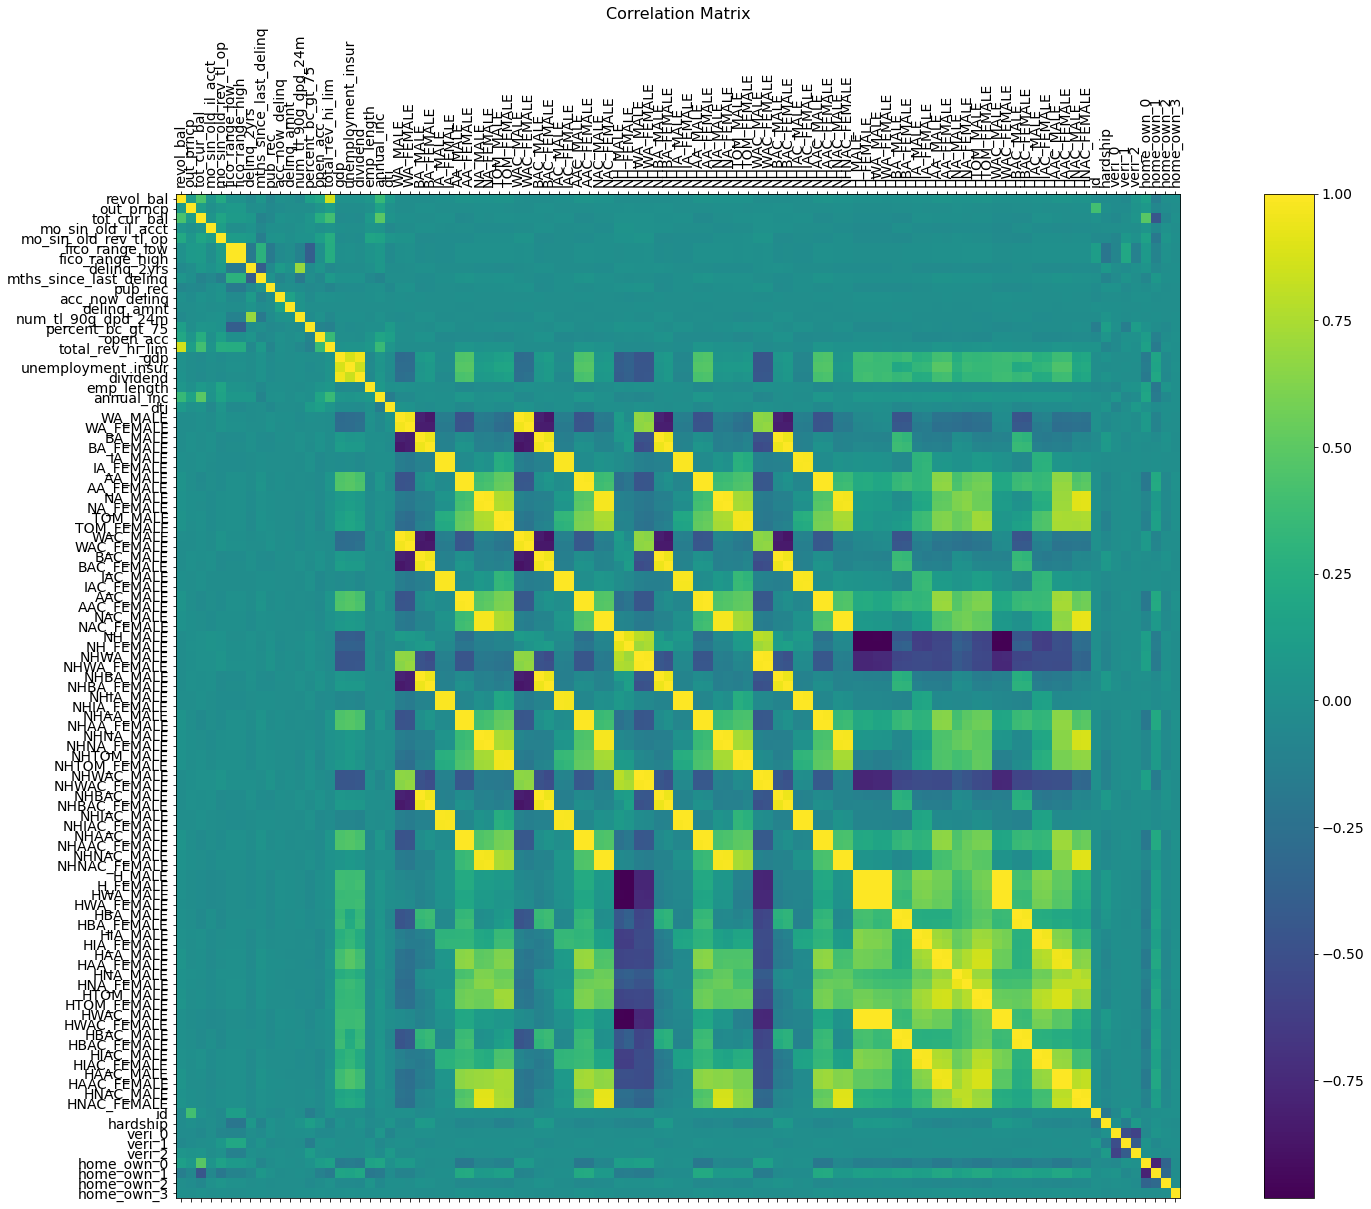

In [281]:
df = data_df
f = plt.figure(figsize=(30, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('books_read.png')